In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
input = cv2.imread(r'C:\Users\Bhavya Singhal\Test_image.png')

In [4]:
cv2.imshow('Wassup', input)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import numpy as np

In [6]:
print (input.shape)

(596, 1072, 3)


In [7]:
cv2.imwrite('Output.jpg',input)

True

# Grayscaling

In [8]:
import cv2

In [9]:
image = cv2.imread(r'C:\Users\Bhavya Singhal\Test_Image.png')

In [10]:
cv2.imshow('Colored',image)
cv2.waitKey()
gary_converted= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayed',gary_converted)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
print (image[0,0])

[26 26 26]


In [12]:
image[10,35]

array([ 4,  5, 17], dtype=uint8)

In [13]:
image[100,340]

array([26, 16, 24], dtype=uint8)

# HSV

In [14]:
import cv2
hsv_image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV',hsv_image)

cv2.imshow('hueChannel', hsv_image[:,:,0])
cv2.imshow('SaturationChannel', hsv_image[:,:,1])
cv2.imshow('BrightnessChannel', hsv_image[:,:,2])
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
hsv_image.shape

(596, 1072, 3)

In [16]:
hsv_image[412,321]

array([ 11,  99, 132], dtype=uint8)

In [17]:
B , G , R = cv2.split(image)

In [18]:
B

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26]], dtype=uint8)

In [19]:
cv2.imshow('Blue',B)
cv2.imshow('Green',G)
cv2.imshow('Red',R)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
merge=cv2.merge([B,G,B])
cv2.imshow('No red',merge)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
merge1 = cv2.merge([B,G+24,R])
cv2.imshow('Amplifyed Green',merge1)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Diagon Alley.jpg',merge1)

True

In [22]:
zeroes = np.zeros(image.shape[:2],dtype='uint8')
blue_merged = cv2.merge([B,zeroes,zeroes])
red_merged = cv2.merge([zeroes,zeroes,R])
green_merged = cv2.merge([zeroes,G,zeroes])
cv2.imshow('Blue',blue_merged)
cv2.imshow('Red',red_merged)
cv2.imshow('Green',green_merged)
cv2.waitKey()
cv2.destroyAllWindows()

# Histogram to Visualize Color Components

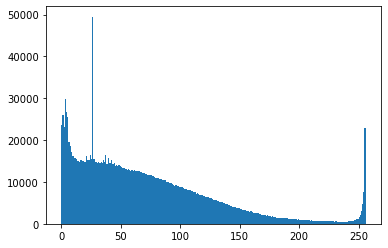

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.hist(image.ravel(),256,[0,256]); plt.show()



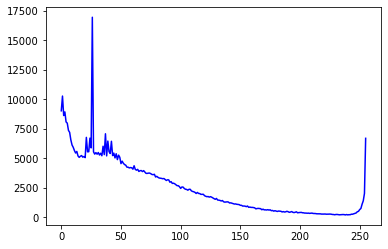

In [24]:
plt.plot(hist,color='b');

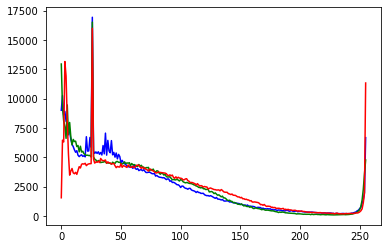

In [25]:
colors = ['b', 'g','r']
k=0
for i in colors:
    histogram= cv2.calcHist([image],[k],None,[256],[0,256])
    plt.plot(histogram,color= i)
    k=k+1
plt.show()    
    

# Adding shapes to Image

In [26]:
image = np.zeros([512,512,3],np.uint8)
cv2.line(image,(324,345),(506,511),[178,189,90],4)
cv2.imshow('Added line',image)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
points= np.array([[9,34],[34,23],[76,87],[34,23]],np.int32)
points.reshape(4,1,2)
points

array([[ 9, 34],
       [34, 23],
       [76, 87],
       [34, 23]])

In [28]:
cv2.polylines(image,[points],True,[213,234,143],4)
cv2.imshow('Poygon',image)
cv2.waitKey()
cv2.destroyAllWindows()

# Image Manipulation

- Transformations

In [29]:
#correct distortions or perspective issues
#Two types:
# Affine(Parallel lines are maintained after transformation) and Non-Affine(collinearity and incidence is maintained)
import cv2
import numpy as np
image = cv2.imread(r'C:\Users\Bhavya Singhal\Test_Image.png')
height, width = image.shape[:2]
fourth_height, fourth_width = height/4,width/4
#       | 1 0 Tx|
#       | 0 1 Ty|, Translation matrix
T = np.float32([[1,0,fourth_width],[0,1,fourth_height]])
# Now use warpaffine function to transform image using T
img_translation = cv2.warpAffine(image,T,(width,height))
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()


In [30]:
image.shape

(596, 1072, 3)

In [31]:
#Declare location of any 3 pts in original image to the final image counterparts
#Generate a matrix to perform that operation
#finally using the warpaffine function we get the desired image
pt1= np.float32([[80,200],[100,340],[250,600]])
pt2 = np.float32([[120,220],[140,380],[290,620]])
M = cv2.getAffineTransform(pt1,pt2)
image_translation = cv2.warpAffine(image,M,(width,height))
cv2.imshow('Fundae',image_translation)
cv2.waitKey()
cv2.destroyAllWindows()

- Rotation

In [32]:
import cv2
import numpy as np
height, weight = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((weight/2,height/2),180,0.5)
rotated_image = cv2.warpAffine(image,rotation_matrix,(weight,height))
cv2.imshow('Rotated and scaled',rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()
# we can use the transpose function to rotate image by 90 degree
# Black space is removed in such a case

- Resizing

In [33]:
import cv2
import numpy as np
image_scaled = cv2.resize(image, None, fx=0.5,fy=1)
cv2.imshow('Scaling',image_scaled)
cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
import cv2
import numpy as np
image = cv2.imread(r'C:\Users\Bhavya Singhal\Test_Image.png')
image_scaled1 = cv2.resize(image, (700,500),interpolation = cv2.INTER_LANCZOS4)
image_scaled2 = cv2.resize(image, (700,500),interpolation = cv2.INTER_AREA)
image_scaled3 = cv2.resize(image, (700,500),interpolation = cv2.INTER_NEAREST)
image_scaled4 = cv2.resize(image, (700,500),interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling-Lancsoz4',image_scaled1)
cv2.imshow('Scaling-Area',image_scaled2)
cv2.imshow('Scaling-nearest',image_scaled3)
cv2.imshow('Scaled-cubic',image_scaled4)
cv2.waitKey()
cv2.destroyAllWindows()

- Image Pyramids

In [35]:
# Converting smaller back to original size we lose pixels i.e quality goes down
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(image)
larger2 = cv2.pyrUp(smaller)
cv2.imshow('Smaller',smaller)
cv2.imshow('Largest',larger)
cv2.imshow('Large',larger2)
cv2.waitKey()
cv2.destroyAllWindows()

In [36]:
i = 0
import cv2
import numpy as np
image = cv2.imread(r'C:\Users\Bhavya Singhal\Test_Image.png')
while(i<10):
    smaller = cv2.pyrDown(image)
    larger = cv2.pyrUp(smaller)
    image = larger
    i=i+1
cv2.imshow('Refined',larger)
cv2.waitKey()
cv2.destroyAllWindows()
# For cropping just use numpy arrays to do that


In [50]:
import cv2
import numpy as np
square = np.zeros((300,300),np.uint8)
square

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [51]:
img = cv2.rectangle(image,(50,50),(250,250),(255,0,0),-1)
cv2.imshow('Rectangle',img)
cv2.waitKey()
cv2.destroyAllWindows()

In [55]:
cv2.ellipse(square,(150,150),(150,150),30,0,180,255,-1)
cv2.imshow('Ellipse',square)
cv2.waitKey()
cv2.destroyAllWindows()
# the shape adding function change the original matrix

In [53]:
cv2.imshow('Created',square)
cv2.waitKey()
cv2.destroyAllWindows()

In [54]:
square[150:,150:]

array([[255,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

# Bitwise operation and masking






In [56]:
# cv2.bitwise_X
# X=And , Overlap of both images
# X= Or , union of both images
# X=XOR , union - overlap
# X= not, inverts the input image

# Convolutions and Blurring

In [3]:
import cv2
import numpy as np
image = cv2.imread(r'C:\Users\Bhavya Singhal\Test_Image.png')
cv2.imshow('Original',image)
kernel = np.ones((3,3),np.float32)/9
blurred = cv2.filter2D(image,-1,kernel)
cv2.imshow('Blurring', blurred)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
#Different types of Blurring
blur = cv2.blur(image,(3,3))
cv2.imshow('Averaging',blur)
gaussian1 = cv2.GaussianBlur(image,(3,3),0)
cv2.imshow('Gaussian',gaussian1)
median = cv2.medianBlur(image,3)
bilateral1 = cv2.bilateralFilter(image,9,75,75)

cv2.imshow('Median',median)
cv2.imshow('Bilateral1',bilateral1)

cv2.waitKey()
cv2.destroyAllWindows()

- Image De-Noising

In [19]:
dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
#Removes details in the image
cv2.imshow('Fast Means Denoising',dst)
cv2.imshow('Original',image)
cv2.waitKey()
cv2.destroyAllWindows()

# Dilation and Erosion

In [20]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(image,kernel,iterations=1)
cv2.imshow('Erosion',erosion)
dilation = cv2.dilate(image,kernel,iterations=1)
cv2.imshow('Dilation',dilation)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
# Opening = Erosion followed by Dilation
# Closing = Dilation followed by Erosion
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel)
cv2.imshow('Opening',opening)
closing = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
cv2.imshow('Closing',closing)
cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
#Threshold
#Edge detection
#Sharpeing matrix
#Perpective affine


# Threshold

In [26]:
# Converting an image to binary form
ret,thresh1= cv2.threshold(image,100,255,cv2.THRESH_BINARY)
cv2.imshow('Threshold BInary',thresh1)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
ret,thresh2 = cv2.threshold(image,130,255,cv2.THRESH_TRUNC)
cv2.imshow('Threshold_Trunc',thresh2)
cv2.waitKey()
cv2.destroyAllWindows()
#Other threshold commands
#thresh_tozero,thresh tozeroinv, thresh binary inv 

In [40]:
#Better way of thresholding is Adaptive thresholding
#Here we gaussian blur firsst to remove noise
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 3,5)
cv2.imshow('Adaptive mean threshold',thresh)
cv2.waitKey()
blur= cv2.GaussianBlur(img,(5,5),0)
_,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU)
cv2.imshow('Otsu and gaussian',th3)
cv2.waitKey()
cv2.destroyAllWindows()

# Edge detection
- Sobel - Emphasize vertical or horizontal
- Laplacian - all orientations
- Canny - Best

In [42]:
#Sobel
im = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
height, weight = im.shape
sobel_x = cv2.Sobel(im,cv2.CV_64F,0,1, ksize=5)
sobel_y = cv2.Sobel(im,cv2.CV_64F, 1,0,ksize=5)
cv2.imshow('SobelX',sobel_x)
cv2.waitKey()
cv2.imshow('Sobely',sobel_y)
cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
sobel_or = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('Sobel_or',sobel_or)
cv2.waitKey()
#Laplacian
laplacian = cv2.Laplacian(im,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.waitKey()
#Canny
canny = cv2.Canny(im, 20, 170)
cv2.imshow('Canny',canny)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#boundary of images
#sudden changes or discontinuities in an image
#Procedure for canny-
#applies gaussian blurring, intensity gradient
# removes pixels which are not edges
# applies threshold



# Mini project - Live sketch

In [55]:
def sketch(image):
    image_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gaussian_img = cv2.GaussianBlur(image_grey,(5,5),0)
    img_canny = cv2.Canny(gaussian_img,10,40)
    ret,mask = cv2.threshold(img_canny,40,255,cv2.THRESH_BINARY_INV)
    return mask
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    cv2.imshow('Live Video Feed',sketch(frame))
    if cv2.waitKey(1)==13:#Enter Key
        break
cap.release()
cv2.destroyAllWindows()
    
    

# 4

# Image Segmentation

In [2]:
import cv2
import numpy as np

In [4]:
image = cv2.imread(r'C:\Users\Bhavya Singhal\Sample1.jpg')
cv2.imshow('Original',image)
cv2.waitKey()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray,30,200)
cv2.imshow('CannyEdges',edged)
cv2.waitKey()
contours,hierarchy = cv2.findContours(edged,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Contours detected',edged)
cv2.waitKey()
print('Number of contours found = ' + str(len(contours)))
cv2.drawContours(image,contours,-1,(0,0,255),3)
cv2.imshow('Contours',image)
cv2.waitKey()
cv2.destroyAllWindows()
print(contours)

Number of contours found = 185
[array([[[ 979, 1594]],

       [[ 980, 1595]],

       [[ 981, 1596]],

       [[ 982, 1597]],

       [[ 983, 1598]],

       [[ 982, 1599]],

       [[ 981, 1599]],

       [[ 980, 1598]],

       [[ 979, 1597]],

       [[ 978, 1596]],

       [[ 977, 1595]],

       [[ 976, 1595]],

       [[ 975, 1596]],

       [[ 974, 1597]],

       [[ 973, 1598]],

       [[ 972, 1599]],

       [[ 973, 1598]],

       [[ 974, 1597]],

       [[ 975, 1596]],

       [[ 976, 1595]],

       [[ 977, 1595]],

       [[ 978, 1596]],

       [[ 979, 1597]],

       [[ 980, 1598]],

       [[ 981, 1599]],

       [[ 982, 1599]],

       [[ 983, 1598]],

       [[ 984, 1599]],

       [[ 984, 1598]],

       [[ 983, 1597]],

       [[ 982, 1596]],

       [[ 981, 1595]],

       [[ 980, 1594]]], dtype=int32), array([[[ 379, 1594]],

       [[ 380, 1595]],

       [[ 381, 1596]],

       [[ 382, 1597]],

       [[ 383, 1598]],

       [[ 382, 1599]],

       [[ 381, 159

In [5]:
#Hierarchy types
#cv2.RETR_LIST - all contours
#cv2.RETR_EXTERNAL - onlu external or outer contours
#cv2.RETR_COMP - allin 2 level hierarchy
#cv2.RETR_TREE - all in full hierarchy

In [1]:
#Sorting Contours

import cv2
import numpy as np
image = cv2.imread(r'C:\Users\Bhavya Singhal\Sample1.jpg')
cv2.imshow('Original',image)
cv2.waitKey()
black_image = np.zeros((image.shape[0],image.shape[1],3))
original_image = image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(image,30,200)
cv2.imshow('Canny_edged',edged)
cv2.waitKey()
contours, hierarchy = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(black_image,contours,-1,(0,255,0),3)
cv2.imshow('2- All Contours over blank image',black_image)
cv2.waitKey()
cv2.drawContours(image,contours,-1,(0,255,0),3)
cv2.imshow('3- All Contours',image)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
#Sorting by area
import cv2
import numpy as np
def get_contour_areas(contours):
    all_areas = []
    for cunt in contours:
        area = cv2.contourArea(cunt)
        all_areas.append(area)
    return all_areas
image = cv2.imread(r'C:\Users\Bhavya Singhal\Sample1.jpg')
original_image = image
print('Contour Areas before sorting'+ str(get_contour_areas(contours)))
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)
print('Contour Areas After Sorting'+ str(get_contour_areas(sorted_contours)))
for c in sorted_contours:
    cv2.drawContours(original_image,[c],-1,(0,255,0),3)
    cv2.waitKey()
    cv2.imshow('Contours by area',original_image)
    
cv2.waitKey()
cv2.destroyAllWindows()


Contour Areas before sorting[4.5, 4.5, 7.5, 19.5, 0.5, 1842.0, 0.5, 410.5, 163.5, 9.5, 7.5, 34.0, 143.0, 143.0, 58.5, 58.5, 128.0, 128.0, 371.5, 116.5, 116.5, 5888.5, 0.5, 177.5, 177.5, 491.0, 77.0, 77.0, 128.0, 128.0, 49.0, 49.0, 2.5, 0.0, 215.5, 172.0, 172.0, 181.5, 181.5, 0.0, 0.0, 0.0, 18.0, 18.0, 371.0, 0.0, 1.0, 0.0, 0.0, 0.0, 133.5, 35.0, 2.0, 376.5, 485.5, 0.0, 341.0, 0.0, 34.0, 1.0, 362.5, 564.0, 0.0, 261.0, 24.0, 634.0, 149.0, 53.5, 0.0, 0.0, 128.0, 103473.0, 880.5, 1837.5, 2.0, 2.0, 123.5, 179.5, 71.0, 124.5, 2667.5, 2667.5, 51.0, 173.0, 183.0, 114.0, 37.5, 7.5, 151.0, 11.0, 219.0, 27.0, 143.0, 143.0, 58.5, 58.5, 128.0, 128.0, 116.5, 116.5, 2729.5, 177.5, 177.5, 77.0, 77.0, 128.0, 128.0, 2.0, 49.0, 0.0, 49.0, 3.5, 172.0, 172.0, 181.5, 181.5, 0.0, 0.0, 18.0, 18.0, 376.5, 15.0, 261.0, 261.0, 149.0, 149.0, 53.5, 54.5, 1052.5, 0.0, 130.0, 107111.5, 1465.0, 2667.5, 2667.5, 19.5, 63.0, 204.0, 73.5, 7.5, 151.0, 13.5, 1.0, 1.5, 3.5, 141.0, 9.0, 0.5, 172.0, 3.0, 7.5, 0.0, 8.0, 169.0,